# Chapter6. Probability 

### 6.1. dependency and independency (종속성과 독립성)

dependency - the occurrence of one affects the probability of occurrence of the other    
independency - the occurrence of one does not affect the probability of occurrence of the other  

### 6. 2. Conditional Probability(조건부 확률) 

When P(B)>0, A's Conditinal probabability when B is occurred is
![conditional_probability](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7f0ff7bcd50dd11514f9f02b1273dab360a4cef)

In [1]:
# Conditional Probability(조건부 확률): P(A|B) -> The probability that A is occured when B is occurred

import matplotlib.pyplot as plt
% matplotlib inline
import random

def random_kid(): # return girl or boy ramdomly
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid() 
    older = random_kid()
    if older == 'girl': # older sibling is girl
        older_girl += 1
    if older == "girl" and younger == "girl": # all of siblings are girl 
        both_girls += 1
    if older == "girl" or younger == "girl": # at least one of sibling is girl.
        either_girl += 1

print("P(both | older): ", both_girls / older_girl) 
# The probability that both of siblings are girl, when older sibling is girl
print("P(both | either): ", both_girls / either_girl ) 
# The probability that both of siblings are girl, when one of siblings is girl at least.
        

P(both | older):  0.5007089325501317
P(both | either):  0.3311897106109325


###  6. 3. Bayes's Theorem (베이즈 정리)

the probability of an event, based on prior knowledge of conditions that might be related to the event.  
두 확률 변수의 사전 확률과 사후 확률 사이의 관계를 나타내는 정리

![Bayes's_Theorem](https://wikimedia.org/api/rest_v1/media/math/render/svg/87c061fe1c7430a5201eef3fa50f9d00eac78810)
  
where __A__ and __B__ are events and __P(B) != 0__.  
  
__P(A|B)__ is a conditional probability: the likelihood of event __A__ occurring given that __B__ is true.  
__P(B|A)__ is also a conditional probability: the likelihood of event __B__ occurring given that __A__ is true.  
__P(A)__ and __P(B)__ are the probabilities of observing __A__ and __B__ independently of each other; this is known as the marginal probability.  

### 6. 4. Random Variable (확률 변수) 

variable associated with probability distribution  
특정 확률분포와 연관되어 있는 변수

Expectation value of random variable(확률 변수의 기댓값)  
ex) Expectation value of random variable for throwing a coin is 1/2.  
    동전 던지기 예시에서 확률변수의 기댓값은 1/2 ( = 0 X 1/2 + 1 X 1/2) 이다.

### 6. 5. Continuous Distribution (연속 분포)

- continuous distribution(연속 분포) : the distribution which has the probability about outcomes of values in continuous range.
- discrete distribution(이산형 분포) :  the distribution which has the caculated probability about results of each events. ex) throwing a coin.  
  
    continuous distribution(연속 분포) <===> discrete distribution(이산형 분포)  
  

- uniform distribution(균등 분포) : all values between 0 and 1 have a equal weight
- [probability density function](https://en.wikipedia.org/wiki/Probability_density_function#Formal_definition)[(확률밀도함수)](https://ko.wikipedia.org/wiki/%ED%99%95%EB%A5%A0_%EB%B0%80%EB%8F%84_%ED%95%A8%EC%88%98) : 밀도함수를 특정 구간에서 적분한 값으로 확률을 나타냄.  

In [2]:
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

- [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)[(누적분포함수)](https://ko.wikipedia.org/wiki/%EB%88%84%EC%A0%81_%EB%B6%84%ED%8F%AC_%ED%95%A8%EC%88%98) : 확률변수의 값이 특정 값보다 작거나 클 확률을 나타내는 함수

In [3]:
def uniform_cdf(x): # return a proportion that value of random variable which has uniform distribution is smaller or same than x
    if x < 0: return 0 # probability of uniform distribution couldn't be smaller than 0
    elif x < 1: return x # ex) P(X <= 0.4) = 0.4
    else: return 1 #  probability of uniform distribution must be smaller than 1

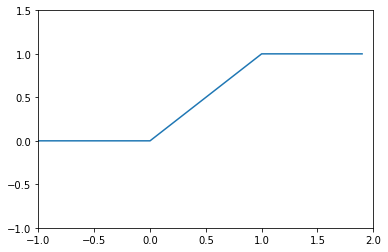

In [4]:
import numpy as np

x = np.arange(-1.0, 2.0, 0.1)

result_array = np.vectorize(uniform_cdf, otypes=[np.float])(x)

plt.plot(x, result_array)
plt.axis([-1, 2, -1, 1.5])
plt.show()

### 6. 6. Normal Distribution (정규 분포) 

[Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)([정규 분포](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%EB%B6%84%ED%8F%AC))


Probability density function of Normal Distribution  
![density_function_of_normal_distribution](https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f)  

__mu__ is the mean or expectation of the distribution (and also its median and mode),  
**sigma**  is the standard deviation, and  
**sigma^2** is the variance.  

In [5]:
import matplotlib.pyplot as plt
import math

In [6]:
% matplotlib inline

In [7]:
def normal_pdf(x, mu=0, sigma=1): # Probability density function of Normal distribution function
    sqrt_two_pi = math.sqrt(2*math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

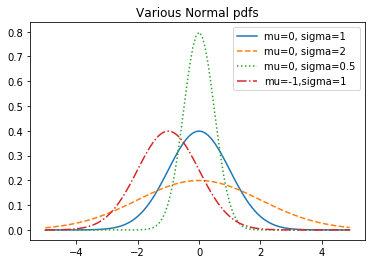

In [8]:
xs  = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x,sigma=0.5) for x in xs], ':', label ='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x,mu=-1) for x in xs], '-.', label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

[Standard normal distribution](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution)(표준정규분포) : normal distribution when mu = 0 and sigma = 1.  
  




In [9]:
def normal_cdf(x, mu=0, sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma )) / 2

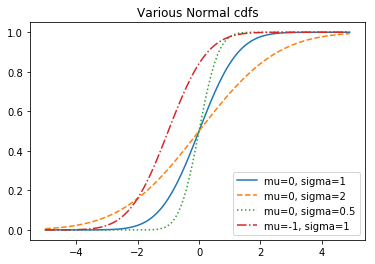

In [10]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma = 1) for x in xs], '-', label = 'mu=0, sigma=1') # Standard Normal Distribution
plt.plot(xs, [normal_cdf(x, sigma = 2) for x in xs], '--', label = 'mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma = 0.5) for x in xs], ':', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_cdf(x, mu = -1, sigma = 1) for x in xs], '-.', label = 'mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [11]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    if mu != 0 or sigma != 1: # if it is not standard normal distribution, convert it to standard normal distribution
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 # density function of normal distribution when x = -10 is close to 0
    hi_z, hi_p = 10.0, 1 #  density function of normal distribution when x = 10 is close to 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # median
        mid_p = normal_cdf(mid_z) # cumulative distribution of median value
        if mid_z < p: # if median is too small, search bigger value
            low_z, low_p = mid_z, mid_p 
        elif mid_z > p: # if median is too large, search small value
            hi_z, hi_p = mid_z, mid_p 
        else:
            break
    return mid_z

# This function uses a binary search to make it closer to the probability value we want.

### 6. 7. Central limit theorem (중심극한정리)

[Central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)([중심극한정리](https://ko.wikipedia.org/wiki/%EC%A4%91%EC%8B%AC_%EA%B7%B9%ED%95%9C_%EC%A0%95%EB%A6%AC)) : when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed  

- binomial random variable(이항확률변수)  
- Bernoulli random variable(베르누이 확률변수) : variable which must be determined as 0 or 1, when only two outcomes are occured in the event.

In [12]:
def bernoulli_trial(p): # bernoulli random variable
    return 1 if random.random() < p else 0

def binomial(n, p): # binomial random variable
    return sum(bernoulli_trial(p) for _ in range(n))

In [17]:
from collections import Counter

def make_hist(p,n, num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    
    histogram = Counter(data)
    print(histogram)
    plt.bar([x for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1-p))
    
    xs = range(min(data), max(data) + 1) 
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
    
# mean of Bernoulli random variable is p, standard deviation(표준 편차) is math.sqrt(p(1-p))    
# According to Central Limit Theorem, 
# if n is large enough, binomial random variable would be similar with random vairable of normal distribution when mu = np and sigma = math.sqrt(np(1-p))

Counter({75: 939, 74: 881, 76: 856, 77: 819, 73: 805, 78: 769, 72: 695, 79: 622, 71: 586, 70: 517, 80: 487, 69: 361, 81: 351, 68: 265, 82: 224, 83: 151, 67: 149, 66: 117, 84: 96, 65: 85, 85: 67, 64: 44, 86: 35, 63: 22, 62: 17, 87: 17, 61: 8, 88: 6, 59: 2, 89: 2, 91: 2, 58: 1, 60: 1, 90: 1})


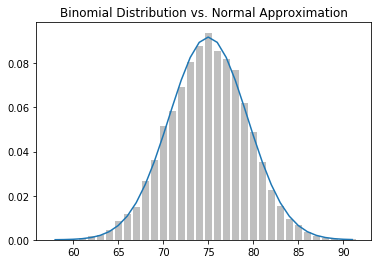

In [18]:
make_hist(0.75, 100, 10000)